In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
calls = pd.read_csv('datasets/megaline_calls.csv')

In [4]:
messages = pd.read_csv('datasets/megaline_messages.csv')

In [5]:
internet = pd.read_csv('datasets/megaline_internet.csv')

In [6]:
users = pd.read_csv('datasets/megaline_users1.csv')

In [7]:
plans = pd.read_csv('datasets/megaline_plans.csv')

In [8]:
calls.head()

id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

In [9]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
messages.head()

id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
internet.head()

id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [14]:
users.head()

user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [17]:
#users['churn_date'].fillna(value='2019-01-01', inplace=True)

In [18]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [19]:
plans.head()

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

### Create a report

In [20]:
users['reg_month'] = users['reg_date'].values.astype('datetime64[M]')
#create a reg_month column

In [21]:
users['churn_month'] = users['churn_date'].values.astype('datetime64[M]')

In [22]:
min_month = users['reg_date'].values.astype('datetime64[M]').min()
#minimum month

In [23]:
max_month = users['reg_date'].values.astype('datetime64[M]').max()
#maximum month

In [24]:
(min_month, max_month)
#range of minimum and maximum

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [25]:
months = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'))
#create a dataframe of the months

In [26]:
months

0
0  2018-01-01
1  2018-02-01
2  2018-03-01
3  2018-04-01
4  2018-05-01
5  2018-06-01
6  2018-07-01
7  2018-08-01
8  2018-09-01
9  2018-10-01
10 2018-11-01
11 2018-12-01

In [27]:
months.columns = ['month'] #rename the month column

In [28]:
len(users)*len(months) #check length of merging each user with each month

6000

In [29]:
users['key'] = 1
months['key'] = 1
#create a uniform key to merge the 2df on

In [30]:
report = months.merge(users, on='key')
#the merge

In [31]:
users[users['churn_date'].notna()].head()

user_id first_name last_name  age  \
6      1006     Jesusa  Bradford   73   
12     1012    Jonelle   Mcbride   59   
22     1022         Bo      Snow   73   
40     1040      Paris    Santos   72   
50     1050       Jone      Owen   23   

                                               city   reg_date      plan  \
6            San Francisco-Oakland-Berkeley, CA MSA 2018-11-27  ultimate   
12           Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-06-28      surf   
22        New York-Newark-Jersey City, NY-NJ-PA MSA 2018-04-20      surf   
40  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA 2018-12-23      surf   
50    Miami-Fort Lauderdale-West Palm Beach, FL MSA 2018-03-20  ultimate   

   churn_date  reg_month churn_month  key  
6  2018-12-18 2018-11-01  2018-12-01    1  
12 2018-11-16 2018-06-01  2018-11-01    1  
22 2018-09-07 2018-04-01  2018-09-01    1  
40 2018-12-30 2018-12-01  2018-12-01    1  
50 2018-10-07 2018-03-01  2018-10-01    1

In [32]:
users.head()

user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  reg_month churn_month  key  
0 2018-12-24  ultimate        NaT 2018-12-01         NaT    1  
1 2018-08-13      surf        NaT 2018-08-01         NaT    1  
2 2018-10-21      surf        NaT 2018-10-01         NaT    1  
3 2018-01-28      surf        NaT 2018-01-01         NaT    1  
4 2018-05-23      surf        NaT 2018-05-01         NaT    1

In [33]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        6000 non-null   datetime64[ns]
 1   key          6000 non-null   int64         
 2   user_id      6000 non-null   int64         
 3   first_name   6000 non-null   object        
 4   last_name    6000 non-null   object        
 5   age          6000 non-null   int64         
 6   city         6000 non-null   object        
 7   reg_date     6000 non-null   datetime64[ns]
 8   plan         6000 non-null   object        
 9   churn_date   408 non-null    datetime64[ns]
 10  reg_month    6000 non-null   datetime64[ns]
 11  churn_month  408 non-null    datetime64[ns]
dtypes: datetime64[ns](5), int64(3), object(4)
memory usage: 609.4+ KB


In [34]:
len(report[report['month']>=report['reg_month']]) #some users came after the minimal date

3355

In [35]:
#some users left before the maximum date
len(report[report['month'] <= report['churn_month']])

366

In [36]:
report = report[report['month'] >= report['reg_month']] 
# select month for user after registration

In [37]:
#report = report[report['month'] <= report['churn_month']]

In [38]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 3 to 5999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   month        3355 non-null   datetime64[ns]
 1   key          3355 non-null   int64         
 2   user_id      3355 non-null   int64         
 3   first_name   3355 non-null   object        
 4   last_name    3355 non-null   object        
 5   age          3355 non-null   int64         
 6   city         3355 non-null   object        
 7   reg_date     3355 non-null   datetime64[ns]
 8   plan         3355 non-null   object        
 9   churn_date   234 non-null    datetime64[ns]
 10  reg_month    3355 non-null   datetime64[ns]
 11  churn_month  234 non-null    datetime64[ns]
dtypes: datetime64[ns](5), int64(3), object(4)
memory usage: 340.7+ KB


In [39]:
report = report[['month', 'key', 'user_id', 'city', 'plan', 'reg_month']] #select only wanted columns

In [40]:
#specific user
report[report['user_id'] == 1000]

month  key  user_id                                   city  \
5500 2018-12-01    1     1000  Atlanta-Sandy Springs-Roswell, GA MSA   

          plan  reg_month  
5500  ultimate 2018-12-01

In [41]:
report[report['user_id'] == 1003]

month  key  user_id           city  plan  reg_month
3    2018-01-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
503  2018-02-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
1003 2018-03-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
1503 2018-04-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
2003 2018-05-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
2503 2018-06-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
3003 2018-07-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
3503 2018-08-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
4003 2018-09-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
4503 2018-10-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
5003 2018-11-01    1     1003  Tulsa, OK MSA  surf 2018-01-01
5503 2018-12-01    1     1003  Tulsa, OK MSA  surf 2018-01-01

### Calls

In [42]:
data = users[['user_id', 'city', 'plan']]
#take specific columns from users

In [43]:
data_calls = data.merge(calls, how='outer', on='user_id')
#merge on data with calls by the outer

In [44]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137754 entries, 0 to 137753
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    137754 non-null  int64  
 1   city       137754 non-null  object 
 2   plan       137754 non-null  object 
 3   id         137735 non-null  object 
 4   call_date  137735 non-null  object 
 5   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


In [45]:
data_calls.head()

user_id                                   city      plan        id  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate   1000_93   
1     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_145   
2     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_247   
3     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_309   
4     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_380   

    call_date  duration  
0  2018-12-27      8.52  
1  2018-12-27     13.66  
2  2018-12-27     14.48  
3  2018-12-28      5.76  
4  2018-12-30      4.22

In [46]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [47]:
data_calls['month'] = data_calls['call_date'].values.astype('datetime64[M]')
#create a month column of datetime

In [48]:
calls_month = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()
#create a groupby which has the sum of call duration for each user in each month

In [49]:
calls_month.sample(10)

user_id      month duration
                             sum
380     1081 2018-04-01    15.69
1764    1387 2018-12-01   440.52
1584    1352 2018-09-01   564.64
61      1016 2018-12-01   789.66
496     1106 2018-11-01   531.86
1515    1335 2018-09-01   422.98
741     1159 2018-09-01   759.40
1696    1371 2018-11-01   416.36
1184    1257 2018-06-01   573.64
693     1150 2018-10-01   428.81

In [50]:
calls_month.columns = ['user_id', 'month', 'total_duration'] # maybe round up the duration at this point

In [51]:
#round up the minutes to the nearest whole number
calls_month['total_duration'] = calls_month['total_duration'].round(0)

In [52]:
user_plan = users[['user_id', 'plan']]
#select each user and there plan to be the dictionary values for merging

In [53]:
user_plan[user_plan['user_id'] == 1233] #testing

user_id  plan
233     1233  surf

In [54]:
calls_month = calls_month.merge(user_plan, on='user_id', how='left')
#merge to find each users plan, in each month.

In [55]:
plans
#look at plans

messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate

In [56]:
call_plan = plans[['plan_name', 'minutes_included']]
#a df for minutes included in each plan

In [57]:
call_plan.columns = ['plan', 'plan_minutes']
#change the column names

In [58]:
call_plan
#check

plan  plan_minutes
0      surf           500
1  ultimate          3000

In [59]:
calls_month = calls_month.merge(call_plan, on='plan', how='left')
#merge each user with their minutes included for their plan, in each month

In [60]:
calls_month['extra_mins'] = calls_month['total_duration'] - calls_month['plan_minutes']
#calculate the extra minutes used every month according tomplan package

In [61]:
#calls_month['extra_mins'] = calls_month['extra_mins'].round(0) #round up the minutes

In [62]:
#change mins to integer
#calls_month['extra_mins'] = calls_month['extra_mins'].astype(np.int64)

In [63]:
#a function to change the -ve values to zero
def count_calc(extra):
    if extra < 0:
        return 0
    if extra == 0:
        return 0
    if extra > 0:
        return extra

In [64]:
calls_month['extra_duration'] = calls_month['extra_mins'].apply(count_calc)
#apply the function to the column

In [65]:
extraminute_plan = plans[['plan_name', 'usd_per_minute']]
# a df to use as key for extra mins in each plan

In [66]:
extraminute_plan.columns = ['plan', 'usd_per_minute']
#change the columns

In [67]:
calls_month = calls_month.merge(extraminute_plan, on='plan', how='left')
#merge each extra minute cost to the calls

In [68]:
calls_month['call_cost'] = calls_month['extra_duration'] * calls_month['usd_per_minute']
#create a cost column of extra mintes used

In [69]:
calls_month = calls_month[['user_id', 'month', 'call_cost']]
#select required columns

In [70]:
report = report.merge(calls_month, on=['user_id', 'month'], how='left')
#merge with the report

In [71]:
report.shape

(3355, 7)

In [72]:
calls_month.shape

(2258, 3)

In [73]:
report.head()
#NaN are for users who did not make calls that month
#0.0 are for users who had no extra cost

month  key  user_id                                             city  \
0 2018-01-01    1     1003                                    Tulsa, OK MSA   
1 2018-01-01    1     1011                         Cleveland-Elyria, OH MSA   
2 2018-01-01    1     1019                             Jacksonville, FL MSA   
3 2018-01-01    1     1029          Tampa-St. Petersburg-Clearwater, FL MSA   
4 2018-01-01    1     1042  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA   

       plan  reg_month  call_cost  
0      surf 2018-01-01        NaN  
1  ultimate 2018-01-01        NaN  
2      surf 2018-01-01        NaN  
3      surf 2018-01-01        NaN  
4      surf 2018-01-01        0.0

### Messages

In [74]:
data.head()

user_id                                   city      plan
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate
1     1001        Seattle-Tacoma-Bellevue, WA MSA      surf
2     1002   Las Vegas-Henderson-Paradise, NV MSA      surf
3     1003                          Tulsa, OK MSA      surf
4     1004        Seattle-Tacoma-Bellevue, WA MSA      surf

In [75]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [76]:
data_messages = data.merge(messages, on='user_id', how='right')

In [77]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [78]:
data_messages['id'].duplicated().sum()
#all messages are unique, so they each get a count of 1.

0

In [79]:
data_messages['msg_count'] = 1

In [80]:
data_messages.head()

user_id                                   city      plan        id  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_125   
1     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_160   
2     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_223   
3     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_251   
4     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_255   

  message_date  msg_count  
0   2018-12-27          1  
1   2018-12-31          1  
2   2018-12-31          1  
3   2018-12-27          1  
4   2018-12-26          1

In [81]:
data_messages['month'] = data_messages['message_date'].values.astype('datetime64[M]')

In [82]:
msg_month = data_messages.groupby(['user_id', 'month'])[['msg_count']].agg(['sum']).reset_index()

In [83]:
msg_month.sample(10)

user_id      month msg_count
                              sum
65      1028 2018-02-01        12
18      1005 2018-12-01        11
1212    1328 2018-12-01       168
1799    1494 2018-12-01        33
1585    1434 2018-06-01        49
1289    1346 2018-10-01        57
649     1175 2018-11-01        30
115     1039 2018-12-01        25
20      1006 2018-12-01       139
19      1006 2018-11-01        15

In [84]:
msg_month.columns = ['user_id', 'month', 'total_msg']

In [85]:
msg_month = msg_month.merge(user_plan, on='user_id', how='left')

In [86]:
msg_plan = plans[['plan_name', 'messages_included']]
msg_plan.columns = ['plan', 'plan_messages']

In [87]:
msg_plan

plan  plan_messages
0      surf             50
1  ultimate           1000

In [88]:
msg_month = msg_month.merge(msg_plan, on='plan', how='left')

In [89]:
msg_month['xtra_msg'] = msg_month['total_msg'] - msg_month['plan_messages']

In [90]:
msg_month['xtra_txt'] = msg_month['xtra_msg'].apply(count_calc)

In [91]:
extramsg_plan = plans[['plan_name', 'usd_per_message']]

In [92]:
extramsg_plan.columns = ['plan', 'usd_per_message']

In [93]:
msg_month = msg_month.merge(extramsg_plan, on='plan', how='left')

In [94]:
msg_month['msg_cost'] = msg_month['xtra_txt'] * msg_month['usd_per_message']

In [95]:
msg_month = msg_month[['user_id', 'month', 'msg_cost']]

In [96]:
report.head()

month  key  user_id                                             city  \
0 2018-01-01    1     1003                                    Tulsa, OK MSA   
1 2018-01-01    1     1011                         Cleveland-Elyria, OH MSA   
2 2018-01-01    1     1019                             Jacksonville, FL MSA   
3 2018-01-01    1     1029          Tampa-St. Petersburg-Clearwater, FL MSA   
4 2018-01-01    1     1042  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA   

       plan  reg_month  call_cost  
0      surf 2018-01-01        NaN  
1  ultimate 2018-01-01        NaN  
2      surf 2018-01-01        NaN  
3      surf 2018-01-01        NaN  
4      surf 2018-01-01        0.0

In [97]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 3354
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      3355 non-null   datetime64[ns]
 1   key        3355 non-null   int64         
 2   user_id    3355 non-null   int64         
 3   city       3355 non-null   object        
 4   plan       3355 non-null   object        
 5   reg_month  3355 non-null   datetime64[ns]
 6   call_cost  2258 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 209.7+ KB


In [98]:
report = report.merge(msg_month, on=['user_id', 'month'], how='left')

In [99]:
report.shape[0]

3355

### Internet

In [100]:
#convert to GB

In [101]:
data_internet = data.merge(internet, how='right', on='user_id')

In [102]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       104825 non-null  int64  
 1   city          104825 non-null  object 
 2   plan          104825 non-null  object 
 3   id            104825 non-null  object 
 4   session_date  104825 non-null  object 
 5   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [103]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [104]:
data_internet['id'].duplicated().sum()

0

In [105]:
data_internet.head()

user_id                                   city      plan        id  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate   1000_13   
1     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_204   
2     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_379   
3     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_413   
4     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate  1000_442   

  session_date  mb_used  
0   2018-12-29    89.86  
1   2018-12-31     0.00  
2   2018-12-28   660.40  
3   2018-12-26   270.99  
4   2018-12-27   880.22

In [106]:
data_internet['month'] = data_internet['session_date'].values.astype('datetime64[M]')

In [107]:
mb_month = data_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()
mb_month.columns = ['user_id', 'month', 'total_mb']

In [108]:
mb_month.head()

user_id      month  total_mb
0     1000 2018-12-01   1901.47
1     1001 2018-08-01   6919.15
2     1001 2018-09-01  13314.82
3     1001 2018-10-01  22330.49
4     1001 2018-11-01  18504.30

In [109]:
mb_month = mb_month.merge(user_plan, on='user_id', how='left')

In [110]:
mb_plan = plans[['plan_name', 'mb_per_month_included']]
mb_plan.columns = ['plan', 'plan_mb']

In [111]:
mb_month = mb_month.merge(mb_plan, on='plan', how='left')

In [112]:
mb_month['extra_mb'] = mb_month['total_mb'] - mb_month['plan_mb']

In [113]:
mb_month['extra_mb'] = mb_month['extra_mb'].apply(count_calc)

In [114]:
def mb_gb_converter(mb):
    if mb == 0:
        return 0
    if mb > 0:
        return mb/1024

In [115]:
mb_month['extra_gb'] = mb_month['extra_mb'].apply(mb_gb_converter)

In [116]:
#write a function the checks decimal place values and performs an action

In [117]:
mb_month['extra_gb'] = mb_month['extra_gb'].round(0)

In [118]:
x = np.round([0.28, 0.50, 0.64, 0.09, 4.59, 3.28], decimals=0)

In [119]:
x

array([0., 0., 1., 0., 5., 3.])

In [120]:
extramb_plan = plans[['plan_name', 'usd_per_gb']]
extramb_plan.columns = ['plan', 'usd_per_gb']

In [121]:
mb_month = mb_month.merge(extramb_plan, on='plan', how='left')

In [122]:
mb_month['gb_cost'] = mb_month['extra_gb'] * mb_month['usd_per_gb']

In [123]:
mb_month = mb_month[['user_id', 'month', 'gb_cost']]

In [124]:
report = report.merge(mb_month, on=['user_id', 'month'], how='left')

In [125]:
report.sample(20)

month  key  user_id                                         city  \
2209 2018-10-01    1     1292          Dallas-Fort Worth-Arlington, TX MSA   
2241 2018-10-01    1     1331          Dallas-Fort Worth-Arlington, TX MSA   
2081 2018-10-01    1     1140    New York-Newark-Jersey City, NY-NJ-PA MSA   
249  2018-03-01    1     1414                       Urban Honolulu, HI MSA   
2410 2018-11-01    1     1022    New York-Newark-Jersey City, NY-NJ-PA MSA   
586  2018-05-01    1     1328  Minneapolis-St. Paul-Bloomington, MN-WI MSA   
1649 2018-09-01    1     1085        Atlanta-Sandy Springs-Roswell, GA MSA   
2402 2018-11-01    1     1011                     Cleveland-Elyria, OH MSA   
101  2018-02-01    1     1268                               Fresno, CA MSA   
3099 2018-12-01    1     1244                    Birmingham-Hoover, AL MSA   
1092 2018-07-01    1     1263           Boston-Cambridge-Newton, MA-NH MSA   
1378 2018-08-01    1     1211    New York-Newark-Jersey City, NY-NJ-PA MSA   
24   2018-01-01    1     1231       San Jose-Sunnyvale-Santa Clara, CA MSA   
3057 2018-12-01    1     1202  Minneapolis-St. Paul-Bloomington, MN-WI MSA   
1153 2018-07-01    1     1368                           Pittsburgh, PA MSA   
2687 2018-11-01    1     1320       Los Angeles-Long Beach-Anaheim, CA MSA   
62   2018-02-01    1     1078              Seattle-Tacoma-Bellevue, WA MSA   
1869 2018-09-01    1     1373  Minneapolis-St. Paul-Bloomington, MN-WI MSA   
2107 2018-10-01    1     1172           Boston-Cambridge-Newton, MA-NH MSA   
2863 2018-12-01    1     1008            Orlando-Kissimmee-Sanford, FL MSA   

          plan  reg_month  call_cost  msg_cost  gb_cost  
2209      surf 2018-01-01       0.00       NaN    310.0  
2241      surf 2018-02-01       0.00      1.05     10.0  
2081      surf 2018-03-01       9.78      0.00     10.0  
249       surf 2018-03-01        NaN       NaN      NaN  
2410      surf 2018-04-01       0.00       NaN     70.0  
586       surf 2018-02-01       8.61      2.97    150.0  
1649  ultimate 2018-07-01       0.00       NaN      0.0  
2402  ultimate 2018-01-01       0.00      0.00      0.0  
101       surf 2018-01-01        NaN       NaN      NaN  
3099      surf 2018-02-01       0.00      0.00     40.0  
1092      surf 2018-03-01       0.00      0.00     40.0  
1378  ultimate 2018-06-01       0.00      0.00      0.0  
24    ultimate 2018-01-01        NaN       NaN      NaN  
3057  ultimate 2018-09-01       0.00       NaN      0.0  
1153  ultimate 2018-05-01       0.00       NaN      0.0  
2687      surf 2018-02-01      11.91      0.66     40.0  
62        surf 2018-02-01        NaN       NaN      NaN  
1869  ultimate 2018-08-01       0.00      0.00      0.0  
2107      surf 2018-03-01       0.00      2.04    190.0  
2863  ultimate 2018-08-01       0.00      0.00      0.0

### Profit

In [126]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3355 entries, 0 to 3354
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      3355 non-null   datetime64[ns]
 1   key        3355 non-null   int64         
 2   user_id    3355 non-null   int64         
 3   city       3355 non-null   object        
 4   plan       3355 non-null   object        
 5   reg_month  3355 non-null   datetime64[ns]
 6   call_cost  2258 non-null   float64       
 7   msg_cost   1806 non-null   float64       
 8   gb_cost    2277 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 262.1+ KB


In [127]:
#fill in NaN values with 0
report.fillna(value=0, inplace=True)

In [128]:
report['total_cost'] = report['call_cost'] + report['msg_cost'] + report['gb_cost']

In [129]:
plan_charge = plans[['plan_name', 'usd_monthly_pay']] 

In [130]:
plan_charge.columns = ['plan', 'monthly_pay']

In [131]:
report = report.merge(plan_charge, on='plan', how='left')

In [132]:
report['profit'] = report['total_cost'] + report['monthly_pay']

In [133]:
report.head()

month  key  user_id                                             city  \
0 2018-01-01    1     1003                                    Tulsa, OK MSA   
1 2018-01-01    1     1011                         Cleveland-Elyria, OH MSA   
2 2018-01-01    1     1019                             Jacksonville, FL MSA   
3 2018-01-01    1     1029          Tampa-St. Petersburg-Clearwater, FL MSA   
4 2018-01-01    1     1042  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA   

       plan  reg_month  call_cost  msg_cost  gb_cost  total_cost  monthly_pay  \
0      surf 2018-01-01        0.0       0.0      0.0         0.0           20   
1  ultimate 2018-01-01        0.0       0.0      0.0         0.0           70   
2      surf 2018-01-01        0.0       0.0      0.0         0.0           20   
3      surf 2018-01-01        0.0       0.0      0.0         0.0           20   
4      surf 2018-01-01        0.0       0.0      0.0         0.0           20   

   profit  
0    20.0  
1    70.0  
2    20.0  
3    20.0  
4    20.0

### Data Analysis

#### Describe the customers behavior.

1. Find the minutes, texts and data users of each plan require every month.
2. Calculate:
    - mean, dispersion and standard deviation
3. Plot histograms.
    - describe the distributions

In [134]:
#create a df with for each user, each month: minutes, txts, data
#slice: surf and ultimate
#find totals of the resources in each slice in each month
    #groupby month, then find totals in each month

In [135]:
calls_month.head()

user_id      month  call_cost
0     1000 2018-12-01        0.0
1     1001 2018-08-01        0.0
2     1001 2018-09-01        0.0
3     1001 2018-10-01        0.0
4     1001 2018-11-01        0.0

In [136]:
c = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()
c.columns = ['user_id', 'month', 'total_minutes']

In [137]:
t = data_messages.groupby(['user_id', 'month'])[['msg_count']].agg(['sum']).reset_index()
t.columns = ['user_id', 'month', 'total_msg']

In [138]:
d = data_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()
d.columns=['user_id', 'month', 'total_data']

In [139]:
r = months.merge(users, on='key')

In [140]:
r = r[['user_id','month', 'city', 'plan']]

In [141]:
r = r.merge(c, on=['user_id', 'month'], how='left')

In [142]:
r = r.merge(t,on=['user_id', 'month'], how='left' )

In [143]:
r = r.merge(d, on=['user_id', 'month'], how='left')

In [144]:
r.fillna(value=0, inplace=True)

In [145]:
r.head()

user_id      month                                   city      plan  \
0     1000 2018-01-01  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate   
1     1001 2018-01-01        Seattle-Tacoma-Bellevue, WA MSA      surf   
2     1002 2018-01-01   Las Vegas-Henderson-Paradise, NV MSA      surf   
3     1003 2018-01-01                          Tulsa, OK MSA      surf   
4     1004 2018-01-01        Seattle-Tacoma-Bellevue, WA MSA      surf   

   total_minutes  total_msg  total_data  
0            0.0        0.0         0.0  
1            0.0        0.0         0.0  
2            0.0        0.0         0.0  
3            0.0        0.0         0.0  
4            0.0        0.0         0.0

In [146]:
r_surf = r.query('plan == "surf"')

In [147]:
r_ultimate = r.query('plan == "ultimate"')

In [148]:
r_surf

user_id      month                                       city  plan  \
1        1001 2018-01-01            Seattle-Tacoma-Bellevue, WA MSA  surf   
2        1002 2018-01-01       Las Vegas-Henderson-Paradise, NV MSA  surf   
3        1003 2018-01-01                              Tulsa, OK MSA  surf   
4        1004 2018-01-01            Seattle-Tacoma-Bellevue, WA MSA  surf   
5        1005 2018-01-01        Dallas-Fort Worth-Arlington, TX MSA  surf   
...       ...        ...                                        ...   ...   
5994     1494 2018-12-01  New York-Newark-Jersey City, NY-NJ-PA MSA  surf   
5995     1495 2018-12-01  New York-Newark-Jersey City, NY-NJ-PA MSA  surf   
5996     1496 2018-12-01               New Orleans-Metairie, LA MSA  surf   
5998     1498 2018-12-01  New York-Newark-Jersey City, NY-NJ-PA MSA  surf   
5999     1499 2018-12-01          Orlando-Kissimmee-Sanford, FL MSA  surf   

      total_minutes  total_msg  total_data  
1              0.00        0.0        0.00  
2              0.00        0.0        0.00  
3              0.00        0.0        0.00  
4              0.00        0.0        0.00  
5              0.00        0.0        0.00  
...             ...        ...         ...  
5994         396.19       33.0    15302.45  
5995         467.47        0.0    24097.40  
5996         278.61       11.0    16438.99  
5998         324.77        0.0    23137.69  
5999         468.10        0.0    22059.21  

[4068 rows x 7 columns]

In [149]:
r_surf_monthly = (r_surf
                  .pivot_table(index='month', values=['total_minutes', 'total_msg', 'total_data'], aggfunc=['sum', 'mean'])
                 )

In [150]:
r_surf_monthly.columns = ['total_data', 'total_minutes', 'total_msg', 'mean_data', 'mean_minutes', 'mean_msg']

In [151]:
r_surf_monthly

total_data  total_minutes  total_msg     mean_data  mean_minutes  \
month                                                                          
2018-01-01     9749.72         385.68       21.0     28.760236      1.137699   
2018-02-01   109609.59        2527.66      108.0    323.332124      7.456224   
2018-03-01   306945.12        7152.31      351.0    905.442832     21.098260   
2018-04-01   599210.15       16619.00      870.0   1767.581563     49.023599   
2018-05-01  1073099.33       29033.10     1849.0   3165.484749     85.643363   
2018-06-01  1484248.33       39499.26     2454.0   4378.313658    116.516991   
2018-07-01  2030815.67       51367.31     3271.0   5990.606696    151.525988   
2018-08-01  2720843.68       62721.48     4662.0   8026.087552    185.019115   
2018-09-01  3218737.67       75852.46     5968.0   9494.801386    223.753569   
2018-10-01  4102786.41       96149.09     8020.0  12102.614779    283.625634   
2018-11-01  4624009.00      113086.75     9165.0  13640.144543    333.589233   
2018-12-01  5766125.26      142297.14    12275.0  17009.219056    419.755575   

             mean_msg  
month                  
2018-01-01   0.061947  
2018-02-01   0.318584  
2018-03-01   1.035398  
2018-04-01   2.566372  
2018-05-01   5.454277  
2018-06-01   7.238938  
2018-07-01   9.648968  
2018-08-01  13.752212  
2018-09-01  17.604720  
2018-10-01  23.657817  
2018-11-01  27.035398  
2018-12-01  36.209440

In [152]:
r_ultimate_monthly = (r_ultimate
                      .pivot_table(index='month', values=['total_minutes', 'total_msg', 'total_data'], aggfunc=['sum', 'mean'])
                     )

In [153]:
r_ultimate_monthly.columns = ['total_data', 'total_minutes', 'total_msg', 'mean_data', 'mean_minutes', 'mean_msg']

In [154]:
r_ultimate_monthly

total_data  total_minutes  total_msg     mean_data  mean_minutes  \
month                                                                          
2018-01-01    27672.37         732.65       62.0    171.878075      4.550621   
2018-02-01   119901.66        2659.03      151.0    744.730807     16.515714   
2018-03-01   219858.22        3428.42      243.0   1365.579006     21.294534   
2018-04-01   338554.75        6646.67      463.0   2102.824534     41.283665   
2018-05-01   482109.99       11126.28      931.0   2994.471988     69.107329   
2018-06-01   720882.29       16441.12     1379.0   4477.529752    102.118758   
2018-07-01   964339.92       23822.27     1937.0   5989.688944    147.964410   
2018-08-01  1264845.13       28206.51     2732.0   7856.180932    175.195714   
2018-09-01  1459408.78       35542.71     3259.0   9064.650807    220.762174   
2018-10-01  1866930.66       45067.81     4181.0  11595.842609    279.924286   
2018-11-01  2163278.04       53400.65     4903.0  13436.509565    331.681056   
2018-12-01  2766801.97       65384.90     6796.0  17185.105404    406.117391   

             mean_msg  
month                  
2018-01-01   0.385093  
2018-02-01   0.937888  
2018-03-01   1.509317  
2018-04-01   2.875776  
2018-05-01   5.782609  
2018-06-01   8.565217  
2018-07-01  12.031056  
2018-08-01  16.968944  
2018-09-01  20.242236  
2018-10-01  25.968944  
2018-11-01  30.453416  
2018-12-01  42.211180

In [155]:
#slice:surf and ultimate for every month
#mean = .mean() of minutes, text, data
#dispersion = 
#standard deviation = .std() of ""


In [156]:
x = r_surf.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].var()

In [157]:
x.columns = ['msg_var', 'data_var', 'mins_var']

In [158]:
y = r_ultimate.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].var()

In [159]:
y.columns = ['msg_var', 'data_var', 'mins_var']

In [160]:
r_surf_monthly = r_surf_monthly.merge(x, on='month', how='left')

In [161]:
r_ultimate_monthly = r_ultimate_monthly.merge(y, on='month', how='left')

In [162]:
a = r_surf.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].std()

In [163]:
a.columns = ['msg_std', 'data_std', 'mins_std']

In [164]:
b = r_ultimate.groupby('month')[['month','total_msg', 'total_data', 'total_minutes']].std()

In [165]:
b.columns = ['msg_std', 'data_std', 'mins_std']

In [166]:
r_surf_monthly = r_surf_monthly.merge(a, on='month', how='left')

In [167]:
r_ultimate_monthly = r_ultimate_monthly.merge(b, on='month', how='left')

In [168]:
#each feature in surf and ultimate
#texts: total, mean, var, std
#minutes, data
#plot surf and ultimate histogram feature together

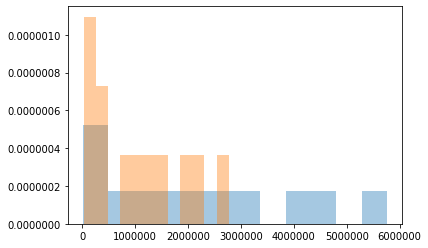

In [176]:
kwargs = dict(histtype='stepfilled', alpha=0.4, normed=True, bins=12)
plt.hist(r_surf_monthly['total_data'], **kwargs)
plt.hist(r_ultimate_monthly['total_data'], **kwargs);

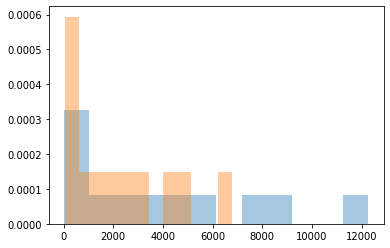

In [191]:
plt.hist(r_surf_monthly['total_msg'], **kwargs)
plt.hist(r_ultimate_monthly['total_msg'], **kwargs);

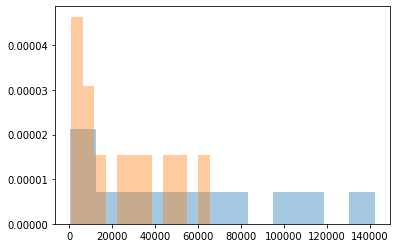

In [192]:
plt.hist(r_surf_monthly['total_minutes'], **kwargs)
plt.hist(r_ultimate_monthly['total_minutes'], **kwargs);

In [199]:
surf_monthly_cols = r_surf_monthly[['total_data', 'total_minutes', 'total_msg']]

In [200]:
surf_monthly_cols.corr()

total_data  total_minutes  total_msg
total_data       1.000000       0.998721   0.995628
total_minutes    0.998721       1.000000   0.995787
total_msg        0.995628       0.995787   1.000000

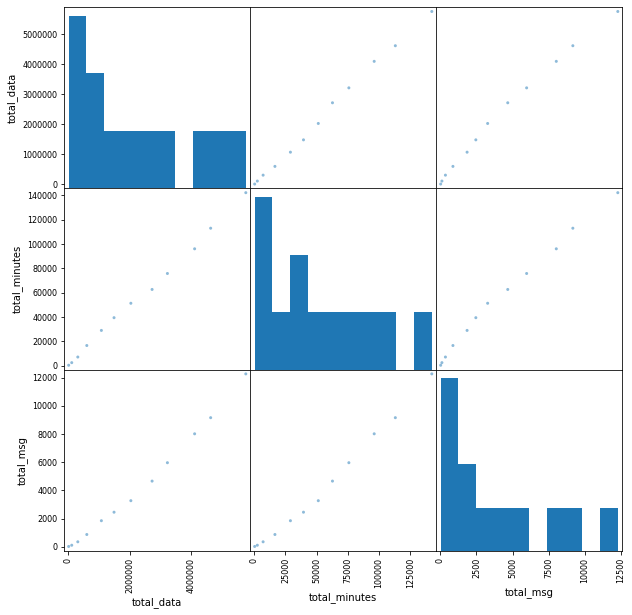

In [201]:
pd.plotting.scatter_matrix(surf_monthly_cols, figsize=(10, 10));

In [202]:
ultimate_monthly_cols = r_surf_monthly[['total_data', 'total_minutes', 'total_msg']]

In [203]:
ultimate_monthly_cols.corr()

total_data  total_minutes  total_msg
total_data       1.000000       0.998721   0.995628
total_minutes    0.998721       1.000000   0.995787
total_msg        0.995628       0.995787   1.000000

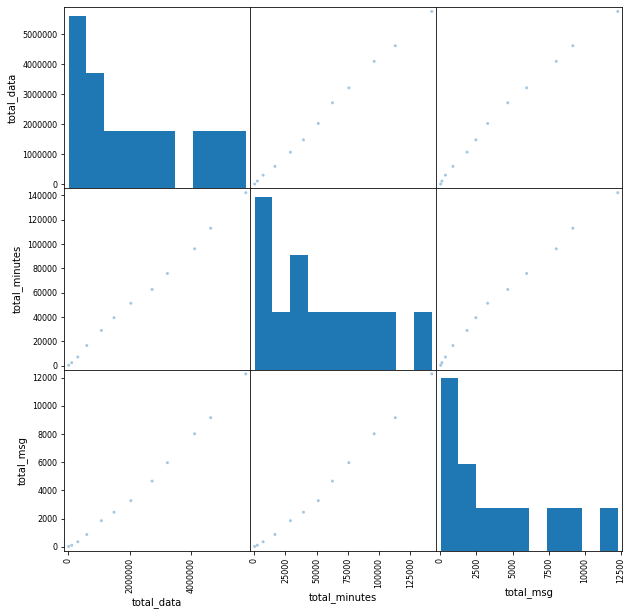

In [209]:
pd.plotting.scatter_matrix(ultimate_monthly_cols,alpha=0.4, figsize=(10, 10));

### Test the hypotheses:

1. The average profit from users of Ultimate and Surf calling plans differs.
        - Average profit from Ultimate and Surf is equal.
    - find profit from report, slice into two, and test the null hypothese
2. The average profit from users in NY-NJ area is different from that of the users from other regions.
        - Average profit from NY-NJ and other cities is equal.
    - query users from NY-NJ, and compare to the rest as others

In [213]:
users.city.value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Cape Coral-Fort Myers, FL MSA                       1
Jacksonville, FL MSA                                1
Albany-Schenectady-Troy, NY MSA                     1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Raleigh-Cary, NC MSA                                1
Name: city, Length: 73, dtype: int64

In [220]:
city_NY = users.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [219]:
city_others = users.query('city not in "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [223]:
city_NY = city_NY[['user_id']]

In [227]:
report.query('user_id in @city_NY.user_id')['user_id'].nunique()

80

In [228]:
city_NY = report.query('user_id in @city_NY.user_id')

In [229]:
city_NY

month  key  user_id                                       city  \
6    2018-01-01    1     1068  New York-Newark-Jersey City, NY-NJ-PA MSA   
8    2018-01-01    1     1079  New York-Newark-Jersey City, NY-NJ-PA MSA   
9    2018-01-01    1     1086  New York-Newark-Jersey City, NY-NJ-PA MSA   
26   2018-01-01    1     1251  New York-Newark-Jersey City, NY-NJ-PA MSA   
27   2018-01-01    1     1257  New York-Newark-Jersey City, NY-NJ-PA MSA   
...         ...  ...      ...                                        ...   
3324 2018-12-01    1     1469  New York-Newark-Jersey City, NY-NJ-PA MSA   
3337 2018-12-01    1     1482  New York-Newark-Jersey City, NY-NJ-PA MSA   
3349 2018-12-01    1     1494  New York-Newark-Jersey City, NY-NJ-PA MSA   
3350 2018-12-01    1     1495  New York-Newark-Jersey City, NY-NJ-PA MSA   
3353 2018-12-01    1     1498  New York-Newark-Jersey City, NY-NJ-PA MSA   

          plan  reg_month  call_cost  msg_cost  gb_cost  total_cost  \
6         surf 2018-01-01        0.0       0.0      0.0         0.0   
8         surf 2018-01-01        0.0       0.0      0.0         0.0   
9     ultimate 2018-01-01        0.0       0.0      0.0         0.0   
26        surf 2018-01-01        0.0       0.0      0.0         0.0   
27        surf 2018-01-01        0.0       0.0      0.0         0.0   
...        ...        ...        ...       ...      ...         ...   
3324      surf 2018-06-01        0.0       0.0    150.0       150.0   
3337  ultimate 2018-01-01        0.0       0.0      0.0         0.0   
3349      surf 2018-04-01        0.0       0.0      0.0         0.0   
3350      surf 2018-09-01        0.0       0.0     90.0        90.0   
3353      surf 2018-02-01        0.0       0.0     80.0        80.0   

      monthly_pay  profit  
6              20    20.0  
8              20    20.0  
9              70    70.0  
26             20    20.0  
27             20    20.0  
...           ...     ...  
3324           20   170.0  
3337           70    70.0  
3349           20    20.0  
3350           20   110.0  
3353           20   100.0  

[552 rows x 12 columns]

In [231]:
city_others = city_others[['user_id']]

In [233]:
report.query('user_id not in @city_NY.user_id')['user_id'].nunique()

420

In [234]:
city_others = report.query('user_id not in @city_NY.user_id')

In [240]:
city_others = city_others[['profit']]

In [241]:
city_NY = city_NY[['profit']]

In [238]:
from scipy import stats as st

In [251]:
alpha = 0.05
city_results = st.ttest_ind(city_NY, city_others)

In [252]:
print(city_results.pvalue)

[0.02277615]


In [253]:
if city_results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


In [254]:
report_ultimate = report.query('plan == "ultimate"')[['profit']]

In [257]:
report_surf

profit
0       20.0
2       20.0
3       20.0
4       20.0
5       20.0
...      ...
3349    20.0
3350   110.0
3351    30.0
3353   100.0
3354    90.0

[2267 rows x 1 columns]

In [256]:
report_surf = report.query('plan == "surf"')[['profit']]

In [258]:
plan_results = st.ttest_ind(report_ultimate, report_surf)

In [259]:
plan_results.pvalue

array([1.51639323e-65])

In [260]:
if plan_results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis
